In [2]:
import math
import pandas as pd

import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [21]:
coffee = pd.read_csv('coffee_consumption.csv')
coffee.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [5]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
date                  261 non-null object
coffee_consumption    261 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [6]:
coffee.date.isnull().sum()

0

In [7]:
coffee.coffee_consumption.isnull().sum()

0

In [22]:
# NOTE! not df.pd.to_datetime(df.date)
# name the series to be changed and store into that particular series or a new series

coffee.date = pd.to_datetime(coffee.date)

In [15]:
# looks good, date is now in correct form no longer object
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
date                  261 non-null datetime64[ns]
coffee_consumption    261 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [16]:
# only get month portion using .dt
coffee.date.dt.month

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
231    11
232    11
233    11
234    11
235    11
236    11
237    11
238    11
239    12
240    12
241    12
242    12
243    12
244    12
245    12
246    12
247    12
248    12
249    12
250    12
251    12
252    12
253    12
254    12
255    12
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [18]:
# assign form, special note %B will report month in word not number
coffee.date.dt.strftime('Today is %a-%d %B, %Y')

0       Today is Tue-01 January, 2019
1       Today is Wed-02 January, 2019
2       Today is Thu-03 January, 2019
3       Today is Fri-04 January, 2019
4       Today is Mon-07 January, 2019
5       Today is Tue-08 January, 2019
6       Today is Wed-09 January, 2019
7       Today is Thu-10 January, 2019
8       Today is Fri-11 January, 2019
9       Today is Mon-14 January, 2019
10      Today is Tue-15 January, 2019
11      Today is Wed-16 January, 2019
12      Today is Thu-17 January, 2019
13      Today is Fri-18 January, 2019
14      Today is Mon-21 January, 2019
15      Today is Tue-22 January, 2019
16      Today is Wed-23 January, 2019
17      Today is Thu-24 January, 2019
18      Today is Fri-25 January, 2019
19      Today is Mon-28 January, 2019
20      Today is Tue-29 January, 2019
21      Today is Wed-30 January, 2019
22      Today is Thu-31 January, 2019
23     Today is Fri-01 February, 2019
24     Today is Mon-04 February, 2019
25     Today is Tue-05 February, 2019
26     Today

In [23]:
coffee = coffee.set_index('date')
coffee.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


In [25]:
# we can slice date
coffee['2019-04':].head()

,coffee_consumption
date,
2019-04-01,12.678782
2019-04-02,11.115349
2019-04-03,11.937308
2019-04-04,9.422997
2019-04-05,9.421859


In [26]:
# Convert TimeSeries to specified frequency.
# Optionally provide filling method to pad/backfill missing values
coffee.asfreq('D').fillna(0)

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
2019-01-06,0.000000
2019-01-07,8.545563
2019-01-08,9.410101
2019-01-09,7.219271


In [28]:
coffee.resample('M').agg(['min', 'mean', 'max', 'count'])

coffee_consumption                            
                          min       mean        max count
date                                                     
2019-01-31           6.354805  10.170728  14.301915    23
2019-02-28           6.805306  10.301943  12.673222    20
2019-03-31           5.680393  10.465667  14.551441    21
2019-04-30           6.534674  10.092301  14.036570    22
2019-05-31           6.220478  10.803482  14.952719    23
2019-06-30           6.010460   9.182825  13.446564    20
2019-07-31           6.500401  10.794238  17.043445    23
2019-08-31           7.429678  10.182139  13.665973    22
2019-09-30           6.358469  10.270905  15.347007    21
2019-10-31           7.381459  10.615371  16.811112    23
2019-11-30           6.391103  10.310467  14.741298    21
2019-12-31           7.056316  10.453933  14.623106    22

In [29]:
coffee.resample('3W').mean()

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [46]:
jan = coffee['2019-01'].copy()
jan = jan.asfreq('D').fillna(0)
jan

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
2019-01-06,0.000000
2019-01-07,8.545563
2019-01-08,9.410101
2019-01-09,7.219271


In [48]:
# moving average
jan['3-day-avg'] = jan.rolling(3).mean()
jan

,coffee_consumption,3-day-avg
date,,
2019-01-01,14.301915,NaN
2019-01-02,12.905900,NaN
2019-01-03,10.046015,12.417943
2019-01-04,6.354805,9.768907
2019-01-05,0.000000,5.466940
2019-01-06,0.000000,2.118268
2019-01-07,8.545563,2.848521
2019-01-08,9.410101,5.985221
2019-01-09,7.219271,8.391645


In [49]:
feb = coffee['2019-02'].copy()
feb = feb.asfreq('D').fillna(0)
feb['shift(1)'] = feb.shift(1)
feb['shift(3)'] = feb.coffee_consumption.shift(3)
feb['shift(-1)'] = feb.coffee_consumption.shift(-1)
feb['delta_coffee_consumption'] = feb['coffee_consumption'] - feb['shift(1)']
feb

,coffee_consumption,shift(1),shift(3),shift(-1),delta_coffee_consumption
date,,,,,
2019-02-01,9.042273,NaN,NaN,0.000000,NaN
2019-02-02,0.000000,9.042273,NaN,0.000000,-9.042273
2019-02-03,0.000000,0.000000,NaN,12.673222,0.000000
2019-02-04,12.673222,0.000000,9.042273,11.562866,12.673222
2019-02-05,11.562866,12.673222,0.000000,9.532721,-1.110356
2019-02-06,9.532721,11.562866,0.000000,10.128274,-2.030145
2019-02-07,10.128274,9.532721,12.673222,12.080342,0.595553
2019-02-08,12.080342,10.128274,11.562866,0.000000,1.952068
2019-02-09,0.000000,12.080342,9.532721,0.000000,-12.080342


In [50]:
march = coffee['2019-03'].copy().asfreq('D').fillna(0)

march['diff(1)'] = march.diff(1)
march

,coffee_consumption,diff(1)
date,,
2019-03-01,9.109061,NaN
2019-03-02,0.000000,-9.109061
2019-03-03,0.000000,0.000000
2019-03-04,9.054681,9.054681
2019-03-05,9.915438,0.860758
2019-03-06,11.254156,1.338718
2019-03-07,5.680393,-5.573763
2019-03-08,8.823756,3.143364
2019-03-09,0.000000,-8.823756


In [51]:
# timezone is nonetype
type(coffee.index.tz)

NoneType

In [53]:
central_timestamps = coffee.index.tz_localize('America/Chicago')
central_timestamps

DatetimeIndex(['2019-01-01 00:00:00-06:00', '2019-01-02 00:00:00-06:00',
               '2019-01-03 00:00:00-06:00', '2019-01-04 00:00:00-06:00',
               '2019-01-07 00:00:00-06:00', '2019-01-08 00:00:00-06:00',
               '2019-01-09 00:00:00-06:00', '2019-01-10 00:00:00-06:00',
               '2019-01-11 00:00:00-06:00', '2019-01-14 00:00:00-06:00',
               ...
               '2019-12-18 00:00:00-06:00', '2019-12-19 00:00:00-06:00',
               '2019-12-20 00:00:00-06:00', '2019-12-23 00:00:00-06:00',
               '2019-12-24 00:00:00-06:00', '2019-12-25 00:00:00-06:00',
               '2019-12-26 00:00:00-06:00', '2019-12-27 00:00:00-06:00',
               '2019-12-30 00:00:00-06:00', '2019-12-31 00:00:00-06:00'],
              dtype='datetime64[ns, America/Chicago]', name='date', length=261, freq=None)

In [54]:
# uniform timezone
central_timestamps.tz_convert('UTC')

DatetimeIndex(['2019-01-01 06:00:00+00:00', '2019-01-02 06:00:00+00:00',
               '2019-01-03 06:00:00+00:00', '2019-01-04 06:00:00+00:00',
               '2019-01-07 06:00:00+00:00', '2019-01-08 06:00:00+00:00',
               '2019-01-09 06:00:00+00:00', '2019-01-10 06:00:00+00:00',
               '2019-01-11 06:00:00+00:00', '2019-01-14 06:00:00+00:00',
               ...
               '2019-12-18 06:00:00+00:00', '2019-12-19 06:00:00+00:00',
               '2019-12-20 06:00:00+00:00', '2019-12-23 06:00:00+00:00',
               '2019-12-24 06:00:00+00:00', '2019-12-25 06:00:00+00:00',
               '2019-12-26 06:00:00+00:00', '2019-12-27 06:00:00+00:00',
               '2019-12-30 06:00:00+00:00', '2019-12-31 06:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=261, freq=None)

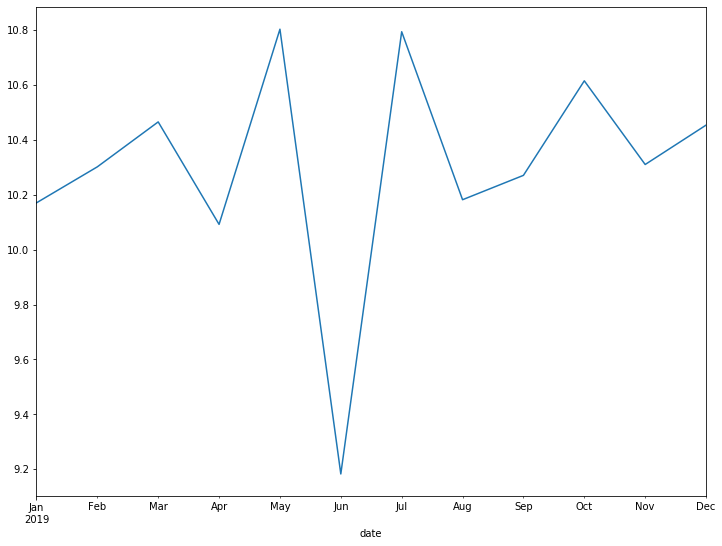

In [56]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 9))

# df.plot()
coffee.resample('M').coffee_consumption.mean().plot()

In [57]:
# assign another col to coffee dataframe ('col_name' = lambda df: df.target_col + operation)
# note we did not assign to original variable the coffee dataframe, so won't store info
coffee.assign(some_other_column=lambda coffee: coffee.coffee_consumption + 100)

,coffee_consumption,some_other_column
date,,
2019-01-01,14.301915,114.301915
2019-01-02,12.905900,112.905900
2019-01-03,10.046015,110.046015
2019-01-04,6.354805,106.354805
2019-01-07,8.545563,108.545563
2019-01-08,9.410101,109.410101
2019-01-09,7.219271,107.219271
2019-01-10,9.338456,109.338456
2019-01-11,11.872667,111.872667


In [58]:
coffee

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
2019-01-08,9.410101
2019-01-09,7.219271
2019-01-10,9.338456
2019-01-11,11.872667


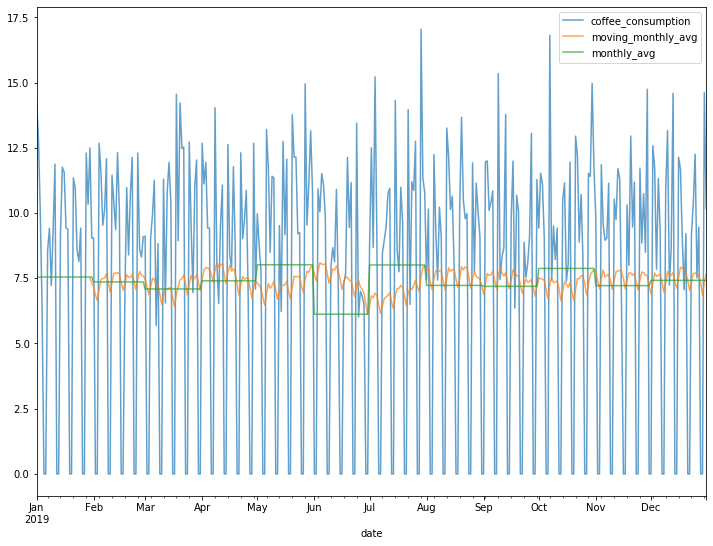

In [60]:
# note we used plenty of assign so dataframe will not be affected 
(coffee.asfreq('D')
 .fillna(0)
 .assign(moving_monthly_avg=lambda coffee: coffee.coffee_consumption.rolling(30).mean())
 .assign(monthly_avg=lambda coffee: coffee.coffee_consumption.resample('M').transform('mean'))
 .plot(alpha=.7))

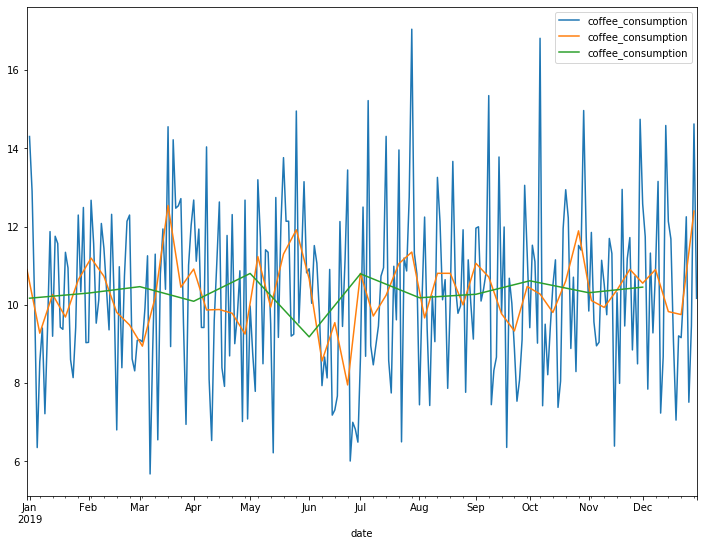

In [62]:
ax = coffee.plot()
coffee.resample('W').mean().plot(ax=ax)
coffee.resample('M').mean().plot(ax=ax)

In [68]:
# note we have 2 layers of col name
tri_monthly = coffee.resample('3M').agg(['min', 'max'])
tri_monthly

coffee_consumption           
                          min        max
date                                    
2019-01-31           6.354805  14.301915
2019-04-30           5.680393  14.551441
2019-07-31           6.010460  17.043445
2019-10-31           6.358469  16.811112
2020-01-31           6.391103  14.741298

In [70]:
tri_montly_cofee_consumption = coffee.coffee_consumption.resample('3M').agg(['min', 'max'])
tri_montly_cofee_consumption['max'] - tri_montly_cofee_consumption['min']

date
2019-01-31     7.947110
2019-04-30     8.871049
2019-07-31    11.032984
2019-10-31    10.452644
2020-01-31     8.350195
Freq: 3M, dtype: float64

In [72]:
tri_monthly.columns = [p1 + '_' + p2 for p1, p2 in tri_monthly.columns]


In [73]:
tri_monthly.columns

Index(['coffee_consumption_min', 'coffee_consumption_max'], dtype='object')

In [74]:
tri_monthly

,coffee_consumption_min,coffee_consumption_max
date,,
2019-01-31,6.354805,14.301915
2019-04-30,5.680393,14.551441
2019-07-31,6.010460,17.043445
2019-10-31,6.358469,16.811112
2020-01-31,6.391103,14.741298


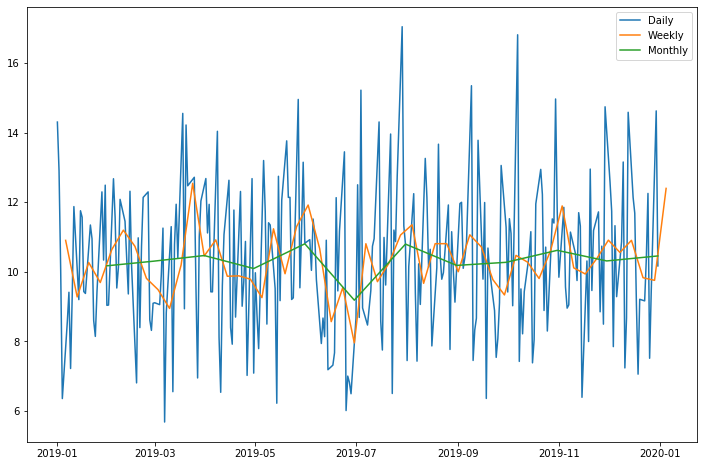

In [63]:
plt.figure(figsize=(12, 8))

plt.plot(coffee.coffee_consumption, label='Daily')
plt.plot(coffee.resample('W').coffee_consumption.mean(), label='Weekly')
plt.plot(coffee.resample('M').coffee_consumption.mean(), label='Monthly')

plt.legend()

In [89]:
from vega_datasets import data
df = data.sf_temps()

In [90]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
temp    8759 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


In [92]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

[Text(0.5, 1.0, 'max')]

<Figure size 1152x504 with 0 Axes>

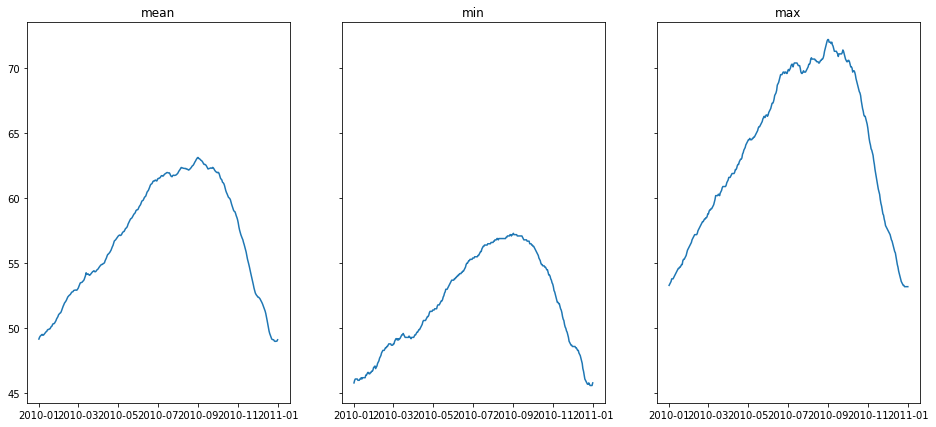

In [80]:
plt.figure(figsize=(16, 7))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7), sharey=True)

ax1.plot(df.resample('D').mean())
ax1.set(title='mean')

ax2.plot(df.resample('D').min())
ax2.set(title='min')

ax3.plot(df.resample('D').max())
ax3.set(title='max')

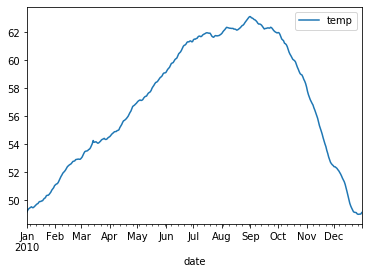

In [28]:
# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
import matplotlib.pyplot as plt
%matplotlib inline
df.resample('D').mean().plot()

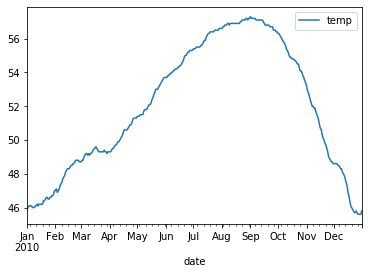

In [30]:
# 2. Write the code necessary to visualize the minimum temperature over time
df.resample('D').min().plot()

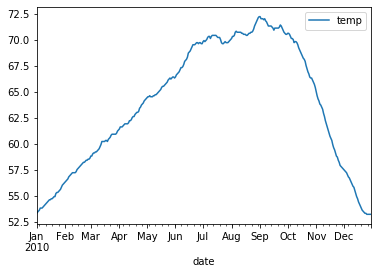

In [31]:
# 3. Write the code necessary to visualize the maximum temperature over time.
df.resample('D').max().plot()

In [82]:
# coldest month on average
df.resample('M').mean().sort_values(by='temp').head()

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139


In [84]:
# highest average temp
df.resample('M').mean().sort_values(by='temp', ascending=False).head()

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091


In [94]:
sf_temps = data.sf_temps().set_index('date').temp.resample('D').agg(['min', 'max'])
sf_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
2010-01-06,46.1,53.8
2010-01-07,46.0,53.8
2010-01-08,46.0,53.9
2010-01-09,46.0,54.0


In [95]:
sf_temps['delta_temp'] = sf_temps['max'] - sf_temps['min']
sf_temps.head()

,min,max,delta_temp
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [96]:
sf_temps.resample('M').delta_temp.mean().sort_values(ascending=False)


date
2010-09-30    14.403333
2010-07-31    13.977419
2010-06-30    13.950000
2010-08-31    13.870968
2010-10-31    13.432258
2010-05-31    12.909677
2010-04-30    12.320000
2010-03-31    10.854839
2010-11-30    10.236667
2010-02-28     9.485714
2010-01-31     8.341935
2010-12-31     7.925806
Name: delta_temp, dtype: float64

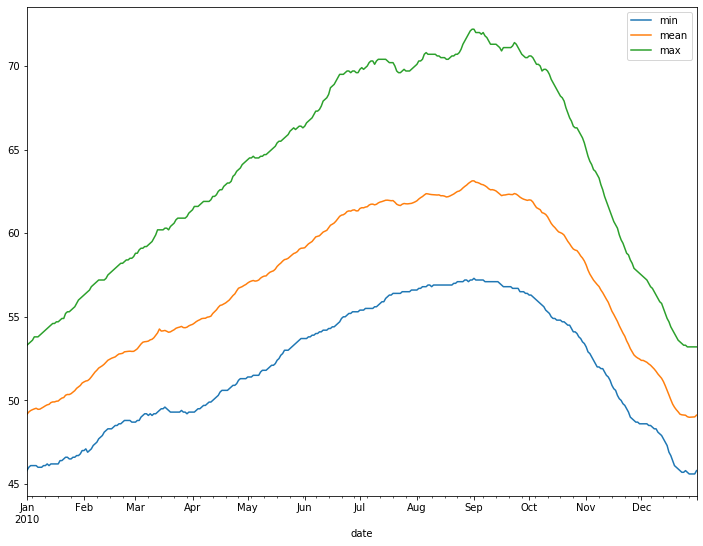

In [97]:
(data.sf_temps()
 .set_index('date')
 .temp
 .resample('D')
 .agg(['min', 'mean', 'max'])
 .plot()
)

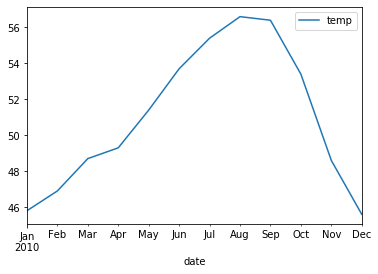

In [33]:
# 4. Which month is the coldest, on average?
df.resample('M').min().plot()

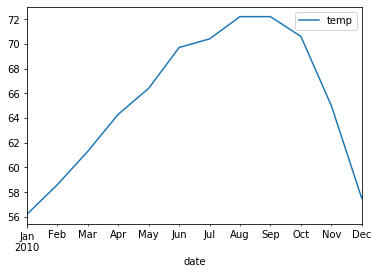

In [34]:
# 5. Which month has the highest average temperature?
df.resample('M').max().plot()

In [78]:
# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
# Use this resampled dataframe to calculate the change in temperature for the day. 
# Which month has the highest daily temperature variability?
g = df.resample('D').agg(['min','max'])

In [86]:
g['diff'] = g.temp['max'] - g.temp['min']

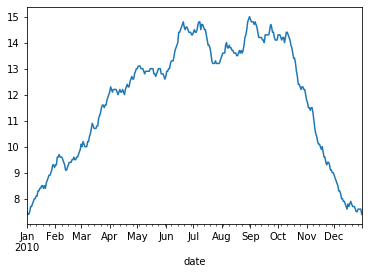

In [82]:
g['diff'].plot()

In [293]:
g['diff'].idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

In [88]:
df

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
2010-01-06,46.1,53.8
2010-01-07,46.0,53.8
2010-01-08,46.0,53.9
2010-01-09,46.0,54.0


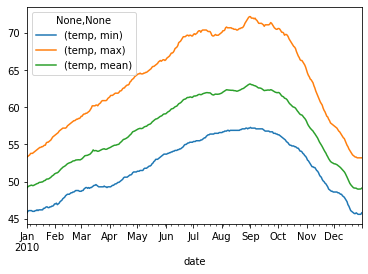

In [92]:
#Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
#i.e. the min, average, and maximum temperature should be 3 seperate lines.
df.resample('D').agg(['min','max','mean']).plot()

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [98]:
from vega_datasets import data
weather = data.seattle_weather().set_index('date')
weather.head()
seattle = data.seattle_weather()

In [99]:
weather.weather.value_counts()


sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [38]:
weather = data.seattle_weather()
weather = weather[['date', 'temp_max']]
weather = weather.set_index('date')
weather

,temp_max
date,
2012-01-01,12.8
2012-01-02,10.6
2012-01-03,11.7
2012-01-04,12.2
2012-01-05,8.9
2012-01-06,4.4
2012-01-07,7.2
2012-01-08,10.0
2012-01-09,9.4


In [42]:
# this can also return the month portion only
weather.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=1461)

In [41]:
weather.groupby(weather.index.month).mean()


,temp_max
date,
1,8.229032
2,9.860177
3,12.387097
4,15.020000
5,19.295968
6,22.400000
7,25.998387
8,26.112097
9,21.924167


In [43]:
# pivoting
weather.groupby([weather.index.year, weather.index.month]).mean()

temp_max
date date           
2012 1      7.054839
     2      9.275862
     3      9.554839
     4     14.873333
     5     17.661290
     6     18.693333
     7     22.906452
     8     25.858065
     9     22.880000
     10    15.829032
     11    11.326667
     12     7.235484
2013 1      6.106452
     2      9.467857
     3     12.709677
     4     14.243333
     5     19.625806
     6     23.253333
     7     26.093548
     8     26.119355
     9     21.360000
     10    14.229032
     11    12.053333
     12     7.022581
2014 1      9.600000
     2      8.200000
     3     12.906452
     4     15.460000
     5     19.870968
     6     21.590000
     7     26.900000
     8     26.383871
     9     23.163333
     10    17.961290
     11    11.030000
     12    10.138710
2015 1     10.154839
     2     12.517857
     3     14.377419
     4     15.503333
     5     20.025806
     6     26.063333
     7     28.093548
     8     26.087097
     9     20.293333
     10    17.538710
     11     9.683333
     12     8.380645

In [100]:
weather.resample('M').precipitation.sum().sort_values().tail(4)


date
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

In [45]:
# alternatively, use resample by 'month' will also 'pivot as month/ year'
weather.resample('M').mean()

,temp_max
date,
2012-01-31,7.054839
2012-02-29,9.275862
2012-03-31,9.554839
2012-04-30,14.873333
2012-05-31,17.661290
2012-06-30,18.693333
2012-07-31,22.906452
2012-08-31,25.858065
2012-09-30,22.880000


In [39]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null datetime64[ns]
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [40]:
seattle = seattle.set_index('date')

In [96]:
# Which year and month combination has the highest amount of precipitation?

In [113]:
seattle.precipitation.resample('M').max().idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

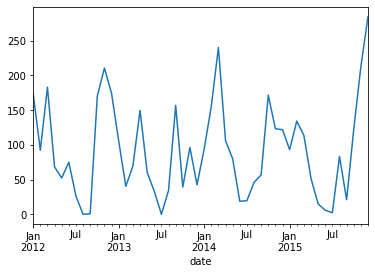

In [294]:
# Visualize the amount of monthly precipitation over time.
weather.resample('M').precipitation.sum().plot() # Zach's

seattle.precipitation.resample('M').sum().plot()

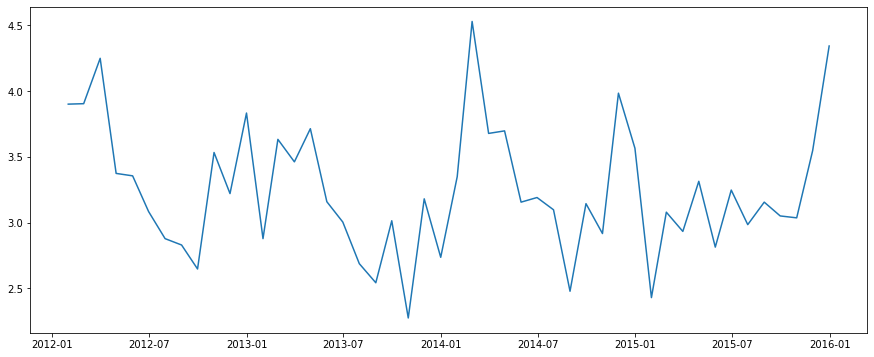

In [123]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.
# Which year-month combination is the windiest?

from matplotlib.pyplot import figure

figure(figsize = (15,6))
plt.plot(seattle.wind.resample('M').mean())
weather.resample('Q').wind.mean().plot()# Zach's, he felt quarter is more meaningful


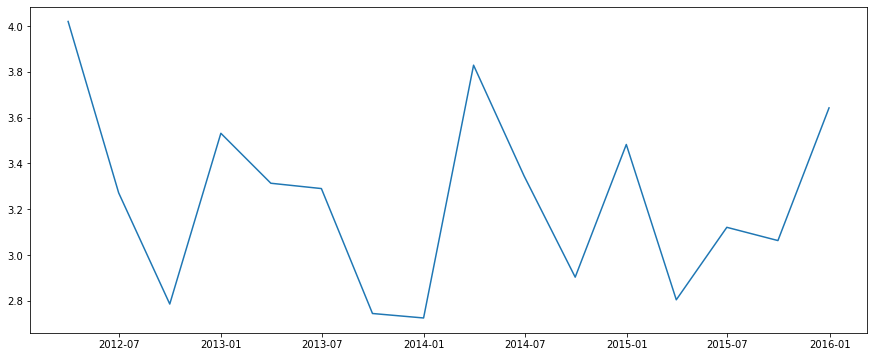

In [295]:
figure(figsize = (15,6))
plt.plot(seattle.wind.resample('Q').mean())

In [298]:
#.index.strftime('%B')
# make month of data into full name EX:January instead of Jan

# np.where(flights.delat <0, 0, flights.delay)
#.any() .all() > logical statement

In [103]:
(weather
 .groupby(weather.index.strftime('%B'))
 .precipitation
 .sum()
 .sort_values()
 .tail()
)

January     466.0
October     503.4
March       606.2
December    622.7
November    642.5
Name: precipitation, dtype: float64

In [104]:
weather['did_rain'] = weather.precipitation > 0
weather

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,True
2012-01-03,0.8,11.7,7.2,2.3,rain,True
2012-01-04,20.3,12.2,5.6,4.7,rain,True
2012-01-05,1.3,8.9,2.8,6.1,rain,True
2012-01-06,2.5,4.4,2.2,2.2,rain,True
2012-01-07,0.0,7.2,2.8,2.3,rain,False
2012-01-08,0.0,10.0,2.8,2.0,sun,False
2012-01-09,4.3,9.4,5.0,3.4,rain,True


In [145]:
# What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)
(seattle.weather == 'sun').resample('Y').sum()

date
2012-12-31    118.0
2013-12-31    205.0
2014-12-31    211.0
2015-12-31    180.0
Freq: A-DEC, Name: weather, dtype: float64

In [105]:
weather.groupby(weather.index.strftime('%B')).did_rain.sum().sort_values().tail()


January     66.0
November    71.0
February    73.0
March       73.0
December    81.0
Name: did_rain, dtype: float64

In [146]:
# In which month does it rain the most?
(seattle.weather == 'rain').resample('M').sum()

date
2012-01-31    18.0
2012-02-29    17.0
2012-03-31    19.0
2012-04-30    19.0
2012-05-31    16.0
2012-06-30    19.0
2012-07-31    12.0
2012-08-31     2.0
2012-09-30     4.0
2012-10-31    17.0
2012-11-30    25.0
2012-12-31    23.0
2013-01-31    16.0
2013-02-28    23.0
2013-03-31    18.0
2013-04-30     0.0
2013-05-31     0.0
2013-06-30     0.0
2013-07-31     1.0
2013-08-31     1.0
2013-09-30     0.0
2013-10-31     1.0
2013-11-30     0.0
2013-12-31     0.0
2014-01-31     0.0
2014-02-28     0.0
2014-03-31     0.0
2014-04-30     0.0
2014-05-31     0.0
2014-06-30     0.0
2014-07-31     1.0
2014-08-31     1.0
2014-09-30     0.0
2014-10-31     1.0
2014-11-30     0.0
2014-12-31     0.0
2015-01-31     1.0
2015-02-28     0.0
2015-03-31     0.0
2015-04-30     1.0
2015-05-31     0.0
2015-06-30     0.0
2015-07-31     0.0
2015-08-31     2.0
2015-09-30     0.0
2015-10-31     1.0
2015-11-30     0.0
2015-12-31     0.0
Freq: M, Name: weather, dtype: float64

In [152]:
# Which month has the most number of days with a non-zero amount of precipitation?
(seattle.precipitation > 0).resample('M').count().idxmax()
# so Jan 2012

Timestamp('2012-01-31 00:00:00', freq='M')

1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
> How would you control for increasing consumption over time when considering how much energy is coming from each source?
>
> express each number as a % of the year's total

In [154]:
from vega_datasets import data
iowa = data.iowa_electricity().set_index('year')
iowa

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


In [165]:
# 1. For each row, calculate the percentage of the year's total that energy source provided.

In [182]:
new = iowa.groupby('source').resample('Y')['net_generation'].sum()

In [184]:
energy_pcts = new.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [185]:
energy_pcts

source          year      
Fossil Fuels    2001-12-31     5.702201
                2002-12-31     5.803792
                2003-12-31     5.842978
                2004-12-31     5.838301
                2005-12-31     5.947633
                2006-12-31     5.968758
                2007-12-31     6.674256
                2008-12-31     6.891147
                2009-12-31     6.227736
                2010-12-31     6.893727
                2011-12-31     6.347228
                2012-12-31     6.027617
                2013-12-31     5.623507
                2014-12-31     5.684301
                2015-12-31     5.211658
                2016-12-31     4.585659
                2017-12-31     4.729500
Nuclear Energy  2001-12-31     4.810057
                2002-12-31     5.710148
                2003-12-31     4.978590
                2004-12-31     6.153328
                2005-12-31     5.665206
                2006-12-31     6.360561
                2007-12-31     5.641487
             

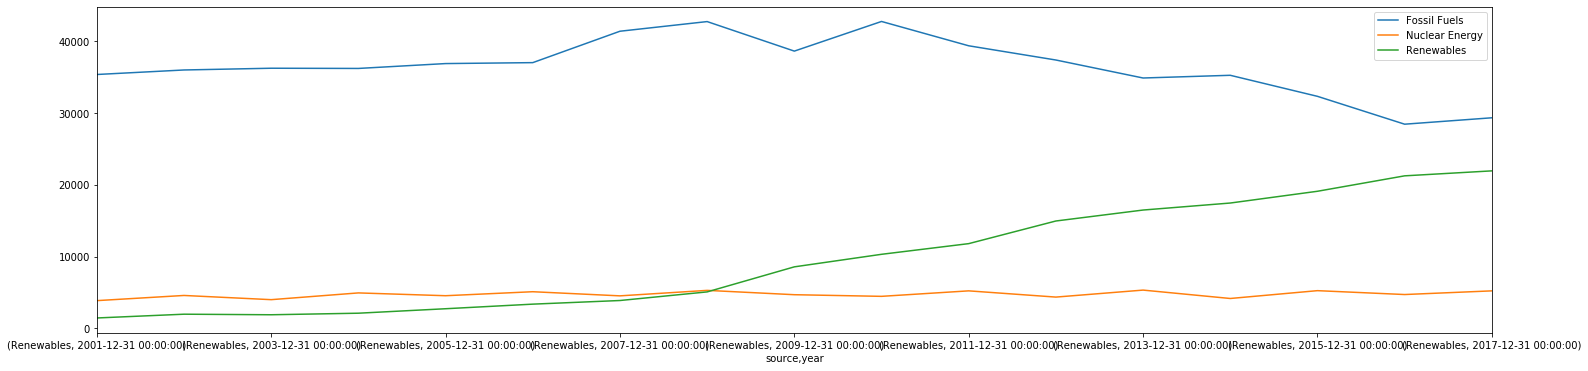

In [203]:
# 2. Lineplot of generation over time, color by source
figure(figsize = (25,6))
new = iowa.groupby('source').resample('Y')['net_generation'].sum()
new.groupby('source').plot()
plt.legend()

In [205]:
# 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
# can have multiple index
table = iowa.pivot_table(values = 'net_generation', index = 'year', columns = 'source')

In [206]:
table

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724
2006-01-01,37014,5095,3364
2007-01-01,41389,4519,3870
2008-01-01,42734,5282,5070
2009-01-01,38620,4679,8560


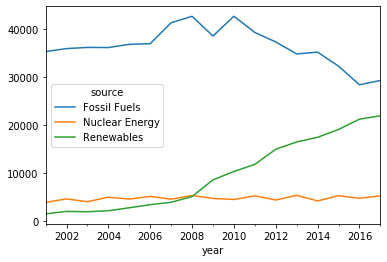

In [218]:
# 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
table.plot()
#.plot.area()

In [ ]:
import seaborn as sns
sns.lineplot(hue = 'source')

5. Is the total generation increasing over time?
> How would you control for increasing consumption over time when considering how much energy is coming from each source?
>
> express each number as a % of the year's total

In [ ]:
new = iowa.groupby('source').resample('Y')['net_generation'].sum()
energy_pcts = new.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [219]:
iowa.resample('Y')['net_generation'].sum()
# shape will be same with original df
# can add back to df
# iowa["yearly_total"] = iowa.resample('Y')['net_generation'].transform('sum')

year
2001-12-31    40651
2002-12-31    42528
2003-12-31    42107
2004-12-31    43236
2005-12-31    44145
2006-12-31    45473
2007-12-31    49778
2008-12-31    53086
2009-12-31    51859
2010-12-31    57509
2011-12-31    56371
2012-12-31    56675
2013-12-31    56670
2014-12-31    56854
2015-12-31    56653
2016-12-31    54381
2017-12-31    56476
Freq: A-DEC, Name: net_generation, dtype: int64

In [220]:
energy_pcts 

source          year      
Fossil Fuels    2001-12-31     5.702201
                2002-12-31     5.803792
                2003-12-31     5.842978
                2004-12-31     5.838301
                2005-12-31     5.947633
                2006-12-31     5.968758
                2007-12-31     6.674256
                2008-12-31     6.891147
                2009-12-31     6.227736
                2010-12-31     6.893727
                2011-12-31     6.347228
                2012-12-31     6.027617
                2013-12-31     5.623507
                2014-12-31     5.684301
                2015-12-31     5.211658
                2016-12-31     4.585659
                2017-12-31     4.729500
Nuclear Energy  2001-12-31     4.810057
                2002-12-31     5.710148
                2003-12-31     4.978590
                2004-12-31     6.153328
                2005-12-31     5.665206
                2006-12-31     6.360561
                2007-12-31     5.641487
             

Use the sf_temps dataset
1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
3. Create pretty labels for time plots
4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [257]:
# Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
df['temp_diff'] = pd.cut(df.temp, 4, labels=['cold','cool','warm','hot'])

In [259]:
df.temp_diff.value_counts()

cool    3754
cold    2169
warm    1821
hot     1015
Name: temp_diff, dtype: int64

In [273]:
df.resample('M')['temp_diff'].value_counts()

date        temp_diff
2010-01-31  cold         557
            cool         187
2010-02-28  cold         357
            cool         315
2010-03-31  cool         342
            cold         294
            warm         107
2010-04-30  cool         308
            cold         211
            warm         201
2010-05-31  cool         402
            warm         267
            cold          44
            hot           31
2010-06-30  cool         365
            warm         184
            hot          171
2010-07-31  cool         329
            hot          226
            warm         189
2010-08-31  cool         263
            warm         251
            hot          230
2010-09-30  cool         254
            warm         245
            hot          221
2010-10-31  cool         359
            warm         249
            hot          136
2010-11-30  cool         410
            cold         182
            warm         128
2010-12-31  cold         524
            cool     

In [274]:
df.groupby('temp_diff').resample('M').count()

temp  temp_diff
temp_diff date                       
cold      2010-01-31   557        557
          2010-02-28   357        357
          2010-03-31   294        294
          2010-04-30   211        211
          2010-05-31    44         44
          2010-06-30     0          0
          2010-07-31     0          0
          2010-08-31     0          0
          2010-09-30     0          0
          2010-10-31     0          0
          2010-11-30   182        182
          2010-12-31   524        524
cool      2010-01-31   187        187
          2010-02-28   315        315
          2010-03-31   342        342
          2010-04-30   308        308
          2010-05-31   402        402
          2010-06-30   365        365
          2010-07-31   329        329
          2010-08-31   263        263
          2010-09-30   254        254
          2010-10-31   359        359
          2010-11-30   410        410
          2010-12-31   220        220
warm      2010-03-31   107        107
          2010-04-30   201        201
          2010-05-31   267        267
          2010-06-30   184        184
          2010-07-31   189        189
          2010-08-31   251        251
          2010-09-30   245        245
          2010-10-31   249        249
          2010-11-30   128        128
hot       2010-05-31    31         31
          2010-06-30   171        171
          2010-07-31   226        226
          2010-08-31   230        230
          2010-09-30   221        221
          2010-10-31   136        136

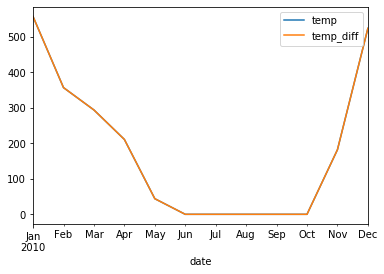

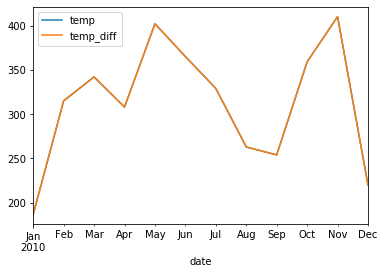

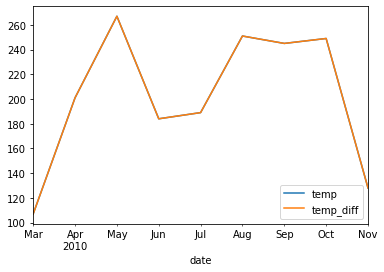

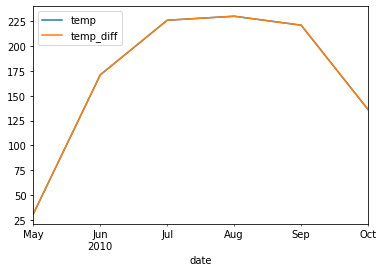

In [285]:
df[df.temp_diff == 'cold'].resample('M').count().plot()
df[df.temp_diff == 'cool'].resample('M').count().plot()
df[df.temp_diff == 'warm'].resample('M').count().plot()
df[df.temp_diff == 'hot'].resample('M').count().plot()
plt.show()

In [222]:
bird = data.birdstrikes()

In [226]:
bird = bird.dropna()

In [231]:
cols = bird.columns.tolist()
for c in cols:
    print(bird[c].value_counts())

AMERICAN AIRLINES                 1815
US AIRWAYS*                        844
MILITARY                           736
SOUTHWEST AIRLINES                 729
DELTA AIR LINES                    585
BUSINESS                           239
UNITED AIRLINES                    228
FEDEX EXPRESS                      188
UPS AIRLINES                       179
AMERICA WEST AIRLINES              158
AMERICAN EAGLE AIRLINES            147
NORTHWEST AIRLINES                 136
ALOHA AIRLINES                     123
ATLANTIC COAST AIRLINES            110
TRANS WORLD AIRLINES               106
CONTINENTAL AIRLINES                93
COMAIR AIRLINES                     84
EXPRESSJET (CONTINENTAL EXPRS)      81
HAWAIIAN AIR                        72
UNKNOWN                             45
AIR CANADA                          45
ALASKA AIRLINES                     33
MESABA AIRLINES                     32
HORIZON AIR                         31
PIEDMONT AIRLINES                   25
AIRTRAN AIRWAYS          

In [233]:
bird

,Aircraft__Airline_Operator,Aircraft__Make_Model,Airport__Name,Cost__Other,Cost__Repair,Cost__Total_$,Effect__Amount_of_damage,Flight_Date,Origin_State,Speed_IAS_in_knots,When__Phase_of_flight,When__Time_of_day,Wildlife__Size,Wildlife__Species
0,MILITARY,T-38A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/8/90 0:00,Louisiana,300.0,Climb,Day,Large,Turkey vulture
1,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/9/90 0:00,Louisiana,200.0,Approach,Night,Medium,Unknown bird or bat
2,MILITARY,B-52,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/11/90 0:00,Louisiana,130.0,Take-off run,Day,Medium,Unknown bird or bat
3,SOUTHWEST AIRLINES,B-737-300,NEW ORLEANS INTL,0,0,0,Substantial,1/11/90 0:00,Louisiana,140.0,Take-off run,Day,Small,Rock pigeon
4,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/12/90 0:00,Louisiana,160.0,Climb,Day,Medium,Unknown bird or bat
5,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,2/2/90 0:00,Louisiana,180.0,Take-off run,Day,Medium,Unknown bird or bat
6,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,2/6/90 0:00,Louisiana,140.0,Climb,Dusk,Medium,Unknown bird or bat
7,FEDEX EXPRESS,B-727,WASHINGTON DULLES INTL ARPT,0,0,0,None,2/22/90 0:00,DC,190.0,Approach,Night,Large,Unknown bird - large
8,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,3/1/90 0:00,Louisiana,180.0,Climb,Day,Medium,Unknown bird or bat
9,MILITARY,B-52,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,3/2/90 0:00,Louisiana,130.0,Take-off run,Dusk,Medium,Unknown bird or bat
